# Run model module locally

In [44]:
import os

# Import os environment variables for file hyperparameters.
os.environ["TRAIN_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/image_translation/google_maps/train*.tfrecord"
os.environ["EVAL_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/image_translation/google_maps/val*.tfrecord"
os.environ["OUTPUT_DIR"] = "gs://machine-learning-1234-bucket/gan/pix2pix/trained_model"

# Import os environment variables for train hyperparameters.
os.environ["TRAIN_BATCH_SIZE"] = str(1)
os.environ["TRAIN_STEPS"] = str(1096 * 200)
os.environ["SAVE_SUMMARY_STEPS"] = str(100)
os.environ["SAVE_CHECKPOINTS_STEPS"] = str(5000)
os.environ["KEEP_CHECKPOINT_MAX"] = str(10)

# Import os environment variables for eval hyperparameters.
os.environ["EVAL_BATCH_SIZE"] = str(1)
os.environ["EVAL_STEPS"] = str(10)
os.environ["START_DELAY_SECS"] = str(6000)
os.environ["THROTTLE_SECS"] = str(6000)

# Import os environment variables for image hyperparameters.
height = 256
os.environ["HEIGHT"] = str(height)
width = 256
os.environ["WIDTH"] = str(width)
depth = 3
os.environ["DEPTH"] = str(depth)
os.environ["PREPROCESS_IMAGE_RESIZE_JITTER_SIZE"] = "286,286"

# Import os environment variables for generator hyperparameters.
os.environ["GENERATOR_USE_UNET_DECODER"] = "True"
os.environ["GENERATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_OPTIMIZER"] = "Adam"
os.environ["GENERATOR_LEARNING_RATE"] = str(0.0002)
os.environ["GENERATOR_ADAM_BETA1"] = str(0.5)
os.environ["GENERATOR_ADAM_BETA2"] = str(0.999)
os.environ["GENERATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["GENERATOR_CLIP_GRADIENTS"] = "None"
os.environ["GENERATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for generator encoder hyperparameters.
os.environ["GENERATOR_ENCODER_NUM_FILTERS"] = ",".join(
    [str(x) for x in [64, 128, 256, 512, 512, 512, 512, 512]]
)
os.environ["GENERATOR_ENCODER_KERNEL_SIZES"] = ",".join(
    [str(x) for x in [4, 4, 4, 4, 4, 4, 4, 4]]
)
os.environ["GENERATOR_ENCODER_STRIDES"] = ",".join(
    [str(x) for x in [2, 2, 2, 2, 2, 2, 2, 2]]
)
os.environ["GENERATOR_ENCODER_USE_BATCH_NORM"] = ",".join(
    [str(x) for x in [False, True, True, True, True, True, True, False]]
)
os.environ["GENERATOR_ENCODER_BATCH_NORM_BEFORE_ACT"] = "True"
os.environ["GENERATOR_ENCODER_ACTIVATION"] = ",".join(
    ["leaky_relu"] * 7 + ["relu"]
)
os.environ["GENERATOR_ENCODER_LEAKY_RELU_ALPHA"] = str(0.2)

# Import os environment variables for generator decoder hyperparameters.
os.environ["GENERATOR_DECODER_NUM_FILTERS"] = ",".join(
    [str(x) for x in [512, 512, 512, 512, 256, 128, 64, depth]]
)
os.environ["GENERATOR_DECODER_KERNEL_SIZES"] = ",".join(
    [str(x) for x in [4, 4, 4, 4, 4, 4, 4, 4]]
)
os.environ["GENERATOR_DECODER_STRIDES"] = ",".join(
    [str(x) for x in [2, 2, 2, 2, 2, 2, 2, 2]]
)
os.environ["GENERATOR_DECODER_USE_BATCH_NORM"] = ",".join(
    [str(x) for x in [True, True, True, True, True, True, True, False]]
)
os.environ["GENERATOR_DECODER_BATCH_NORM_BEFORE_ACT"] = "True"
os.environ["GENERATOR_DECODER_ACTIVATION"] = ",".join(
    ["relu"] * 7 + ["tanh"]
)
os.environ["GENERATOR_DECODER_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["GENERATOR_DECODER_DROPOUT_RATES"] = ",".join(
    [str(x) for x in [0.5, 0.5, 0.5, 0., 0., 0., 0., 0.]]
)
os.environ["GENERATOR_DECODER_DROPOUT_BEFORE_ACT"] = "True"

# Import os environment variables for discriminator hyperparameters.
os.environ["DISCRIMINATOR_NUM_FILTERS"] = ",".join(
    [str(x) for x in [64, 128, 256, 512, 512, 1]]
)
os.environ["DISCRIMINATOR_KERNEL_SIZES"] = ",".join(
    [str(x) for x in [4, 4, 4, 4, 4, 4]]
)
os.environ["DISCRIMINATOR_STRIDES"] = ",".join(
    [str(x) for x in [2, 2, 2, 2, 1, 1]]
)
os.environ["DISCRIMINATOR_USE_BATCH_NORM"] = ",".join(
    [str(x) for x in [False, True, True, True, True, False]]
)
os.environ["DISCRIMINATOR_BATCH_NORM_BEFORE_ACT"] = "True"
os.environ["DISCRIMINATOR_USE_LEAKY_RELU"] = "True"
os.environ["DISCRIMINATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["DISCRIMINATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["DISCRIMINATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["DISCRIMINATOR_OPTIMIZER"] = "Adam"
os.environ["DISCRIMINATOR_LEARNING_RATE"] = str(0.0002)
os.environ["DISCRIMINATOR_ADAM_BETA1"] = str(0.5)
os.environ["DISCRIMINATOR_ADAM_BETA2"] = str(0.999)
os.environ["DISCRIMINATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["DISCRIMINATOR_CLIP_GRADIENTS"] = "None"
os.environ["DISCRIMINATOR_TRAIN_STEPS"] = str(1)


## Train pix2pix model

In [9]:
%%bash
gsutil -m rm -rf ${OUTPUT_DIR}
export PYTHONPATH=$PYTHONPATH:$PWD/pix2pix_module
python3 -m trainer.task \
    --train_file_pattern=${TRAIN_FILE_PATTERN} \
    --eval_file_pattern=${EVAL_FILE_PATTERN} \
    --output_dir=${OUTPUT_DIR} \
    --job-dir=./tmp \
    \
    --train_batch_size=${TRAIN_BATCH_SIZE} \
    --train_steps=${TRAIN_STEPS} \
    --save_summary_steps=${SAVE_SUMMARY_STEPS} \
    --save_checkpoints_steps=${SAVE_CHECKPOINTS_STEPS} \
    --keep_checkpoint_max=${KEEP_CHECKPOINT_MAX} \
    \
    --eval_batch_size=${EVAL_BATCH_SIZE} \
    --eval_steps=${EVAL_STEPS} \
    --start_delay_secs=${START_DELAY_SECS} \
    --throttle_secs=${THROTTLE_SECS} \
    \
    --height=${HEIGHT} \
    --width=${WIDTH} \
    --depth=${DEPTH} \
    --preprocess_image_resize_jitter_size=${PREPROCESS_IMAGE_RESIZE_JITTER_SIZE} \
    \
    --generator_use_unet_decoder=${GENERATOR_USE_UNET_DECODER} \
    --generator_l1_regularization_scale=${GENERATOR_L1_REGULARIZATION_SCALE} \
    --generator_l2_regularization_scale=${GENERATOR_L2_REGULARIZATION_SCALE} \
    --generator_optimizer=${GENERATOR_OPTIMIZER} \
    --generator_learning_rate=${GENERATOR_LEARNING_RATE} \
    --generator_adam_beta1=${GENERATOR_ADAM_BETA1} \
    --generator_adam_beta2=${GENERATOR_ADAM_BETA2} \
    --generator_adam_epsilon=${GENERATOR_ADAM_EPSILON} \
    --generator_clip_gradients=${GENERATOR_CLIP_GRADIENTS} \
    --generator_train_steps=${GENERATOR_TRAIN_STEPS} \
    \
    --generator_encoder_num_filters=${GENERATOR_ENCODER_NUM_FILTERS} \
    --generator_encoder_kernel_sizes=${GENERATOR_ENCODER_KERNEL_SIZES} \
    --generator_encoder_strides=${GENERATOR_ENCODER_STRIDES} \
    --generator_encoder_use_batch_norm=${GENERATOR_ENCODER_USE_BATCH_NORM} \
    --generator_encoder_batch_norm_before_act=${GENERATOR_ENCODER_BATCH_NORM_BEFORE_ACT} \
    --generator_encoder_activation=${GENERATOR_ENCODER_ACTIVATION} \
    --generator_encoder_leaky_relu_alpha=${GENERATOR_ENCODER_LEAKY_RELU_ALPHA} \
    \
    --generator_decoder_num_filters=${GENERATOR_DECODER_NUM_FILTERS} \
    --generator_decoder_kernel_sizes=${GENERATOR_DECODER_KERNEL_SIZES} \
    --generator_decoder_strides=${GENERATOR_DECODER_STRIDES} \
    --generator_decoder_use_batch_norm=${GENERATOR_DECODER_USE_BATCH_NORM} \
    --generator_decoder_batch_norm_before_act=${GENERATOR_DECODER_BATCH_NORM_BEFORE_ACT} \
    --generator_decoder_activation=${GENERATOR_DECODER_ACTIVATION} \
    --generator_decoder_leaky_relu_alpha=${GENERATOR_DECODER_LEAKY_RELU_ALPHA} \
    --generator_decoder_dropout_rates=${GENERATOR_DECODER_DROPOUT_RATES} \
    --generator_decoder_dropout_before_act=${GENERATOR_DECODER_DROPOUT_BEFORE_ACT} \
    \
    --discriminator_num_filters=${DISCRIMINATOR_NUM_FILTERS} \
    --discriminator_kernel_sizes=${DISCRIMINATOR_KERNEL_SIZES} \
    --discriminator_strides=${DISCRIMINATOR_STRIDES} \
    --discriminator_use_batch_norm=${DISCRIMINATOR_USE_BATCH_NORM} \
    --discriminator_batch_norm_before_act=${DISCRIMINATOR_BATCH_NORM_BEFORE_ACT} \
    --discriminator_use_leaky_relu=${DISCRIMINATOR_USE_LEAKY_RELU} \
    --discriminator_leaky_relu_alpha=${DISCRIMINATOR_LEAKY_RELU_ALPHA} \
    --discriminator_l1_regularization_scale=${DISCRIMINATOR_L1_REGULARIZATION_SCALE} \
    --discriminator_l2_regularization_scale=${DISCRIMINATOR_L2_REGULARIZATION_SCALE} \
    --discriminator_optimizer=${DISCRIMINATOR_OPTIMIZER} \
    --discriminator_learning_rate=${DISCRIMINATOR_LEARNING_RATE} \
    --discriminator_adam_beta1=${DISCRIMINATOR_ADAM_BETA1} \
    --discriminator_adam_beta2=${DISCRIMINATOR_ADAM_BETA2} \
    --discriminator_adam_epsilon=${DISCRIMINATOR_ADAM_EPSILON} \
    --discriminator_clip_gradients=${DISCRIMINATOR_CLIP_GRADIENTS} \
    --discriminator_train_steps=${DISCRIMINATOR_TRAIN_STEPS}


train_and_evaluate: args = {'train_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/image_translation/google_maps/train*.tfrecord', 'eval_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/image_translation/google_maps/val*.tfrecord', 'output_dir': 'gs://machine-learning-1234-bucket/gan/pix2pix/trained_model/', 'train_batch_size': 1, 'train_steps': 16, 'save_summary_steps': 100, 'save_checkpoints_steps': 5000, 'keep_checkpoint_max': 10, 'eval_batch_size': 1, 'eval_steps': 10, 'start_delay_secs': 6000, 'throttle_secs': 6000, 'height': 256, 'width': 256, 'depth': 3, 'preprocess_image_resize_jitter_size': [286, 286], 'generator_use_unet_decoder': True, 'generator_l1_regularization_scale': 0.0, 'generator_l2_regularization_scale': 0.0, 'generator_optimizer': 'Adam', 'generator_learning_rate': 0.0002, 'generator_adam_beta1': 0.5, 'generator_adam_beta2': 0.999, 'generator_adam_epsilon': 1e-08, 'generator_clip_gradients': None, 'generator_train_steps': 1, 'generator_l1_loss

CommandException: 1 files/objects could not be removed.



INFO:tensorflow:Using config: {'_model_dir': 'gs://machine-learning-1234-bucket/gan/pix2pix/trained_model/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 5000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 10, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f773b7504d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_rep

## Prediction

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [31]:
import pix2pix_module.trainer.input as input_fn


def try_out_input_function(arguments, print_features=False):
    """Trys out input function for testing purposes.

    Args:
        arguments: dict, user passed parameters.
        print_out: bool, whether to print features or not.
    Returns:
        Dictionary of feature arrays and array of labels.
    """
    with tf.Session() as sess:
        fn = input_fn.read_dataset(
            filename=arguments["filename"],
            mode=tf.estimator.ModeKeys.EVAL,
            batch_size=10,
            params=arguments
        )

        features = sess.run(fetches=fn())
        print(
            "features[source_image].shape = {}".format(
                features["source_image"].shape
            )
        )
        if print_features:
            print("features = \n{}".format(features))

    return features


In [35]:
arguments = {
    "height": height,
    "width": width,
    "depth": depth,
    "preprocess_image_resize_jitter_size": [256, 256]
}

In [36]:
arguments["filename"] = "gs://machine-learning-1234-bucket/gan/data/image_translation/google_maps/val*.tfrecord"
features = try_out_input_function(arguments, print_features=False)


decode_example: parsed_features = {'source_image_raw': <tf.Tensor 'ParseSingleExample/ParseSingleExample:0' shape=() dtype=string>, 'target_image_raw': <tf.Tensor 'ParseSingleExample/ParseSingleExample:1' shape=() dtype=string>}

handle_input_image: image_bytes = Tensor("ParseSingleExample/ParseSingleExample:0", shape=(), dtype=string)

decode_image: image_bytes = Tensor("ParseSingleExample/ParseSingleExample:0", shape=(), dtype=string)
decode_image: image = Tensor("image_decoded:0", shape=(?,), dtype=uint8)
decode_image: image = Tensor("image_reshaped:0", shape=(256, 256, 3), dtype=uint8)
handle_input_image: image = Tensor("image_reshaped:0", shape=(256, 256, 3), dtype=uint8)

preprocess_image: image = Tensor("image_reshaped:0", shape=(256, 256, 3), dtype=uint8)
preprocess_image: image = Tensor("preprocess_image_jitter_resize/Squeeze:0", shape=(256, 256, 3), dtype=uint8)
preprocess_image: image = Tensor("preprocess_image_jitter_crop:0", shape=(256, 256, 3), dtype=uint8)
preprocess_im

In [37]:
test_source_images = ((features["source_image"] + 1.0) * (255. / 2)).astype(np.uint8)

In [38]:
!gsutil ls gs://machine-learning-1234-bucket/gan/pix2pix/trained_model/export/exporter

gs://machine-learning-1234-bucket/gan/pix2pix/trained_model/export/exporter/
gs://machine-learning-1234-bucket/gan/pix2pix/trained_model/export/exporter/1593235834/


In [39]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/pix2pix/trained_model/export/exporter/1593235834"
)
predictions = predict_fn(
    {
        "source_image": test_source_images
    }
)

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/pix2pix/trained_model/export/exporter/1593235834/variables/variables


Convert image back to the original scale.

In [40]:
generated_images = np.clip(
    a=((predictions["generated_images"] + 1.0) * (255. / 2)).astype(np.int32),
    a_min=0,
    a_max=255
)

In [41]:
print(generated_images.shape)

(10, 256, 256, 3)


In [42]:
def plot_images(images, color=True):
    """Plots images.

    Args:
        images: np.array, array of images of
            [num_images, image_size, image_size, num_channels].
    """
    num_images = len(images)

    plt.figure(figsize=(32, 32))
    for i in range(num_images):
        image = images[i]
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if color:
            plt.imshow(
                X=image,
                cmap=plt.cm.binary
            )
        else:
            plt.imshow(
                image.reshape(image.shape[:-1]),
                cmap="gray_r"
            )
    plt.show()

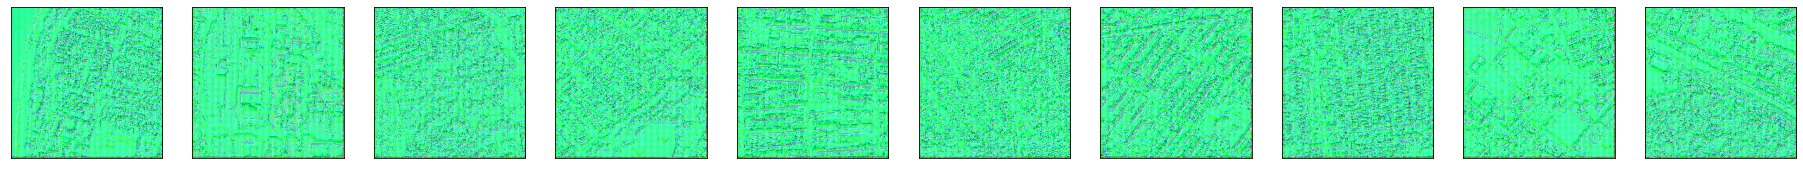

In [43]:
plot_images(images=generated_images, color=True)